### Libraires

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import numpy as nd
import matplotlib.pyplot as plt
import plotly.express as px
import squarify
import matplotlib.cm as cm
import statsmodels.api as sm

### Reading Data

In [2]:
df_players= pd.read_csv('Jogadores.csv',delimiter=',' )

In [3]:
del df_players['Unnamed: 0']

In [4]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   weight                   3510 non-null   int64  
 1   birthDate                3510 non-null   object 
 2   height                   3510 non-null   int64  
 3   foot                     3491 non-null   object 
 4   shortName                3510 non-null   object 
 5   currentNationalTeamId    1343 non-null   float64
 6   passportArea.name        3510 non-null   object 
 7   passportArea.alpha3code  3510 non-null   object 
 8   role.code2               3510 non-null   object 
 9   role.code3               3510 non-null   object 
 10  role.name                3510 non-null   object 
 11  birthArea.name           3510 non-null   object 
 12  birthArea.alpha2code     3210 non-null   object 
 13  age_2018                 3510 non-null   int64  
dtypes: float64(1), int64(3),

In [5]:
df_players.describe()

,weight,height,currentNationalTeamId,age_2018
count,3510.00000,3510.000000,1343.000000,3510.000000
mean,76.32792,182.391738,10464.281459,26.804274
std,6.96483,6.593051,5689.491364,4.735180
min,55.00000,162.000000,664.000000,17.000000
25%,72.00000,178.000000,5629.000000,23.000000
50%,76.00000,183.000000,10451.000000,27.000000
75%,81.00000,187.000000,15594.000000,30.000000
max,101.00000,203.000000,34101.000000,45.000000


### Histograms

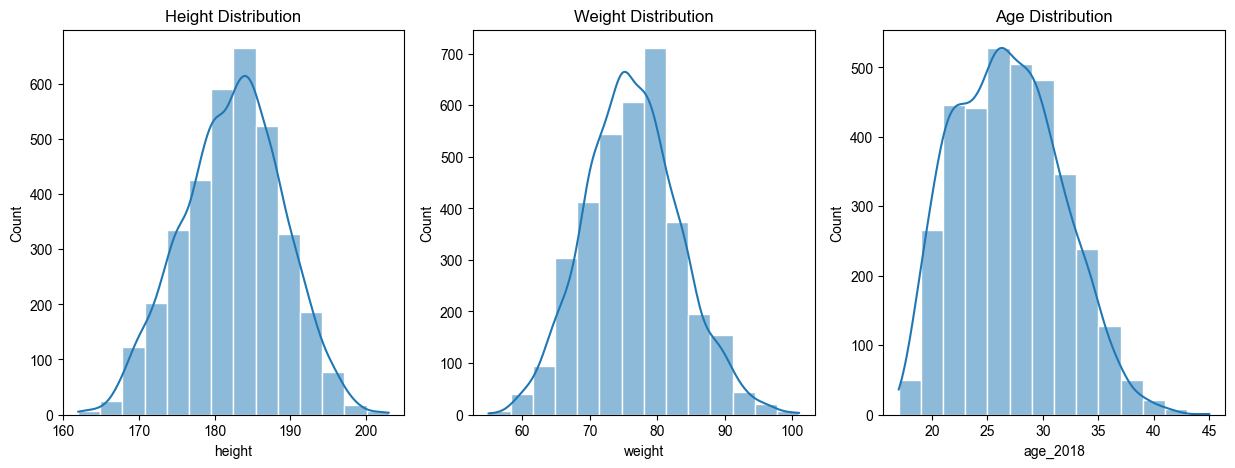

In [6]:

fig, axs = plt.subplots(1,3, figsize=(15,5))

sns.set(style="whitegrid", palette="viridis")

sns.histplot(df_players['height'], bins=14, kde=True, ax=axs[0])
sns.histplot(df_players['weight'], bins=14, kde=True, ax=axs[1])
sns.histplot(df_players['age_2018'], bins=14, kde=True, ax=axs[2])

axs[0].set_title('Height Distribution')
axs[1].set_title('Weight Distribution')
axs[2].set_title('Age Distribution')

# Exibindo o gráfico
plt.show()


### Positions

C:\Users\TIBUFF\AppData\Local\Temp\ipykernel_6984\2969034053.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_bar = sns.countplot(x='role.name', data= df_players, ax=axs[0], palette=role_color_mapping)
C:\Users\TIBUFF\AppData\Local\Temp\ipykernel_6984\2969034053.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='role.name', y='age_2018', data=df_players,ax=axs[1],palette=role_color_mapping)


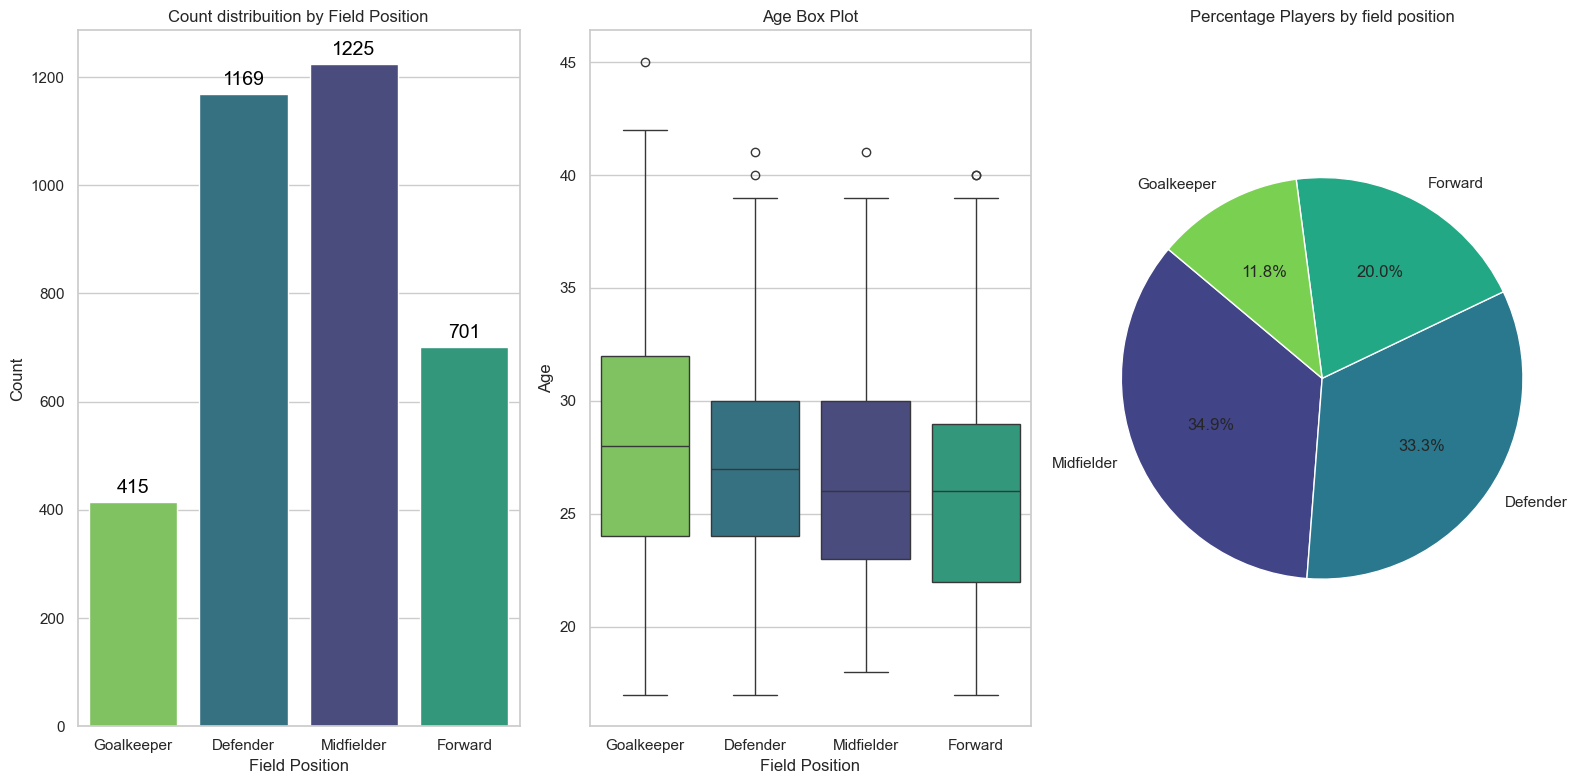

In [7]:
# Count by position
player_count_by_role= df_players['role.name'].value_counts()

#figure
fig, axs = plt.subplots(1,3, figsize=(16,8))

# Definindo uma paleta de cores específica
unique_roles = player_count_by_role.index
palette = sns.color_palette("viridis", len(unique_roles))

# Criando um dicionário que mapeia cada função a uma cor específica
role_color_mapping = dict(zip(unique_roles, palette))

# Barplot
sns.set(style="white", palette="viridis")
ax_bar = sns.countplot(x='role.name', data= df_players, ax=axs[0], palette=role_color_mapping)

#Data Labels
for p in ax_bar.patches:
    ax_bar.annotate(f'{int(p.get_height())}',
    (p.get_x()+ p.get_width()/2., p.get_height()),
    ha ='center', va= 'center', fontsize=14, color ='black', xytext = (0,10),
    textcoords= 'offset points') 
    
# Title and label elements
axs[0].set_title('Count distribuition by Field Position')
axs[0].set_xlabel('Field Position')
axs[0].set_ylabel('Count')

# Box Plot
sns.boxplot(x='role.name', y='age_2018', data=df_players,ax=axs[1],palette=role_color_mapping)
axs[1].set_title('Age Box Plot')
axs[1].set_xlabel('Field Position')
axs[1].set_ylabel('Age')

# Pizza Chart
axs[2].pie(player_count_by_role, labels=player_count_by_role.index, autopct='%1.1f%%', startangle= 140, colors=[role_color_mapping[role] for role in player_count_by_role.index])
axs[2].set_title('Percentage Players by field position')
axs[2].axis('equal')

plt.tight_layout()

plt.show()

In [8]:
player_count_by_role

role.name
Midfielder    1225
Defender      1169
Forward        701
Goalkeeper     415
Name: count, dtype: int64

<Figure size 1500x1000 with 0 Axes>

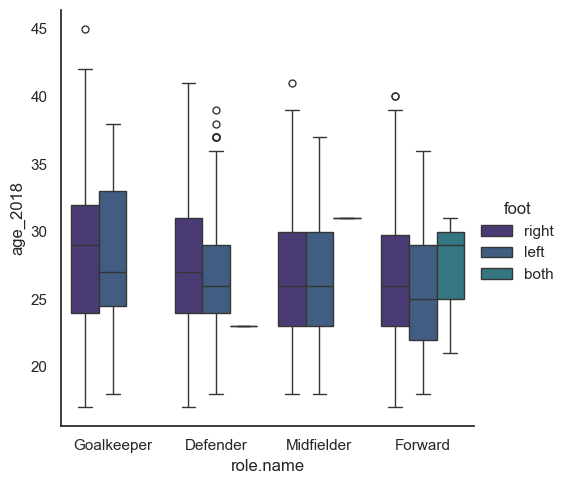

In [9]:
plt.figure(figsize=(15,10))
sns.catplot(data=df_players, x='role.name', y ='age_2018', hue='foot', kind="box" )
plt.show()

<Figure size 1500x1000 with 0 Axes>

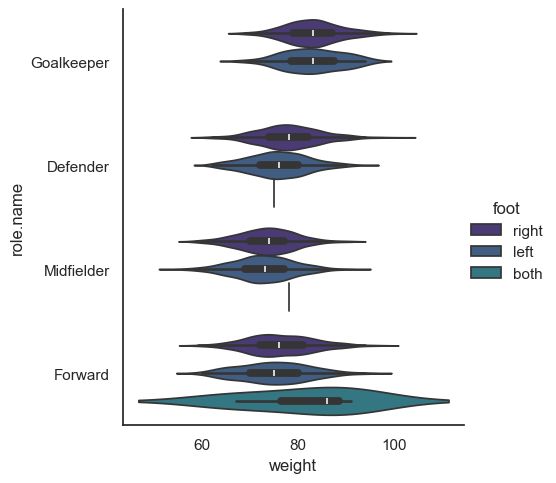

In [10]:
plt.figure(figsize=(15,10))
sns.catplot(data=df_players, x='weight', y ='role.name', hue='foot',kind="violin" )
plt.show()

### Dashboard

C:\Users\TIBUFF\AppData\Local\Temp\ipykernel_6984\3733218199.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_bar = sns.countplot(x='role.name', data=df_players, ax=axs[1, 0], palette=role_color_mapping)
C:\Users\TIBUFF\AppData\Local\Temp\ipykernel_6984\3733218199.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='role.name', y='age_2018', data=df_players, ax=axs[1, 1], palette=role_color_mapping)


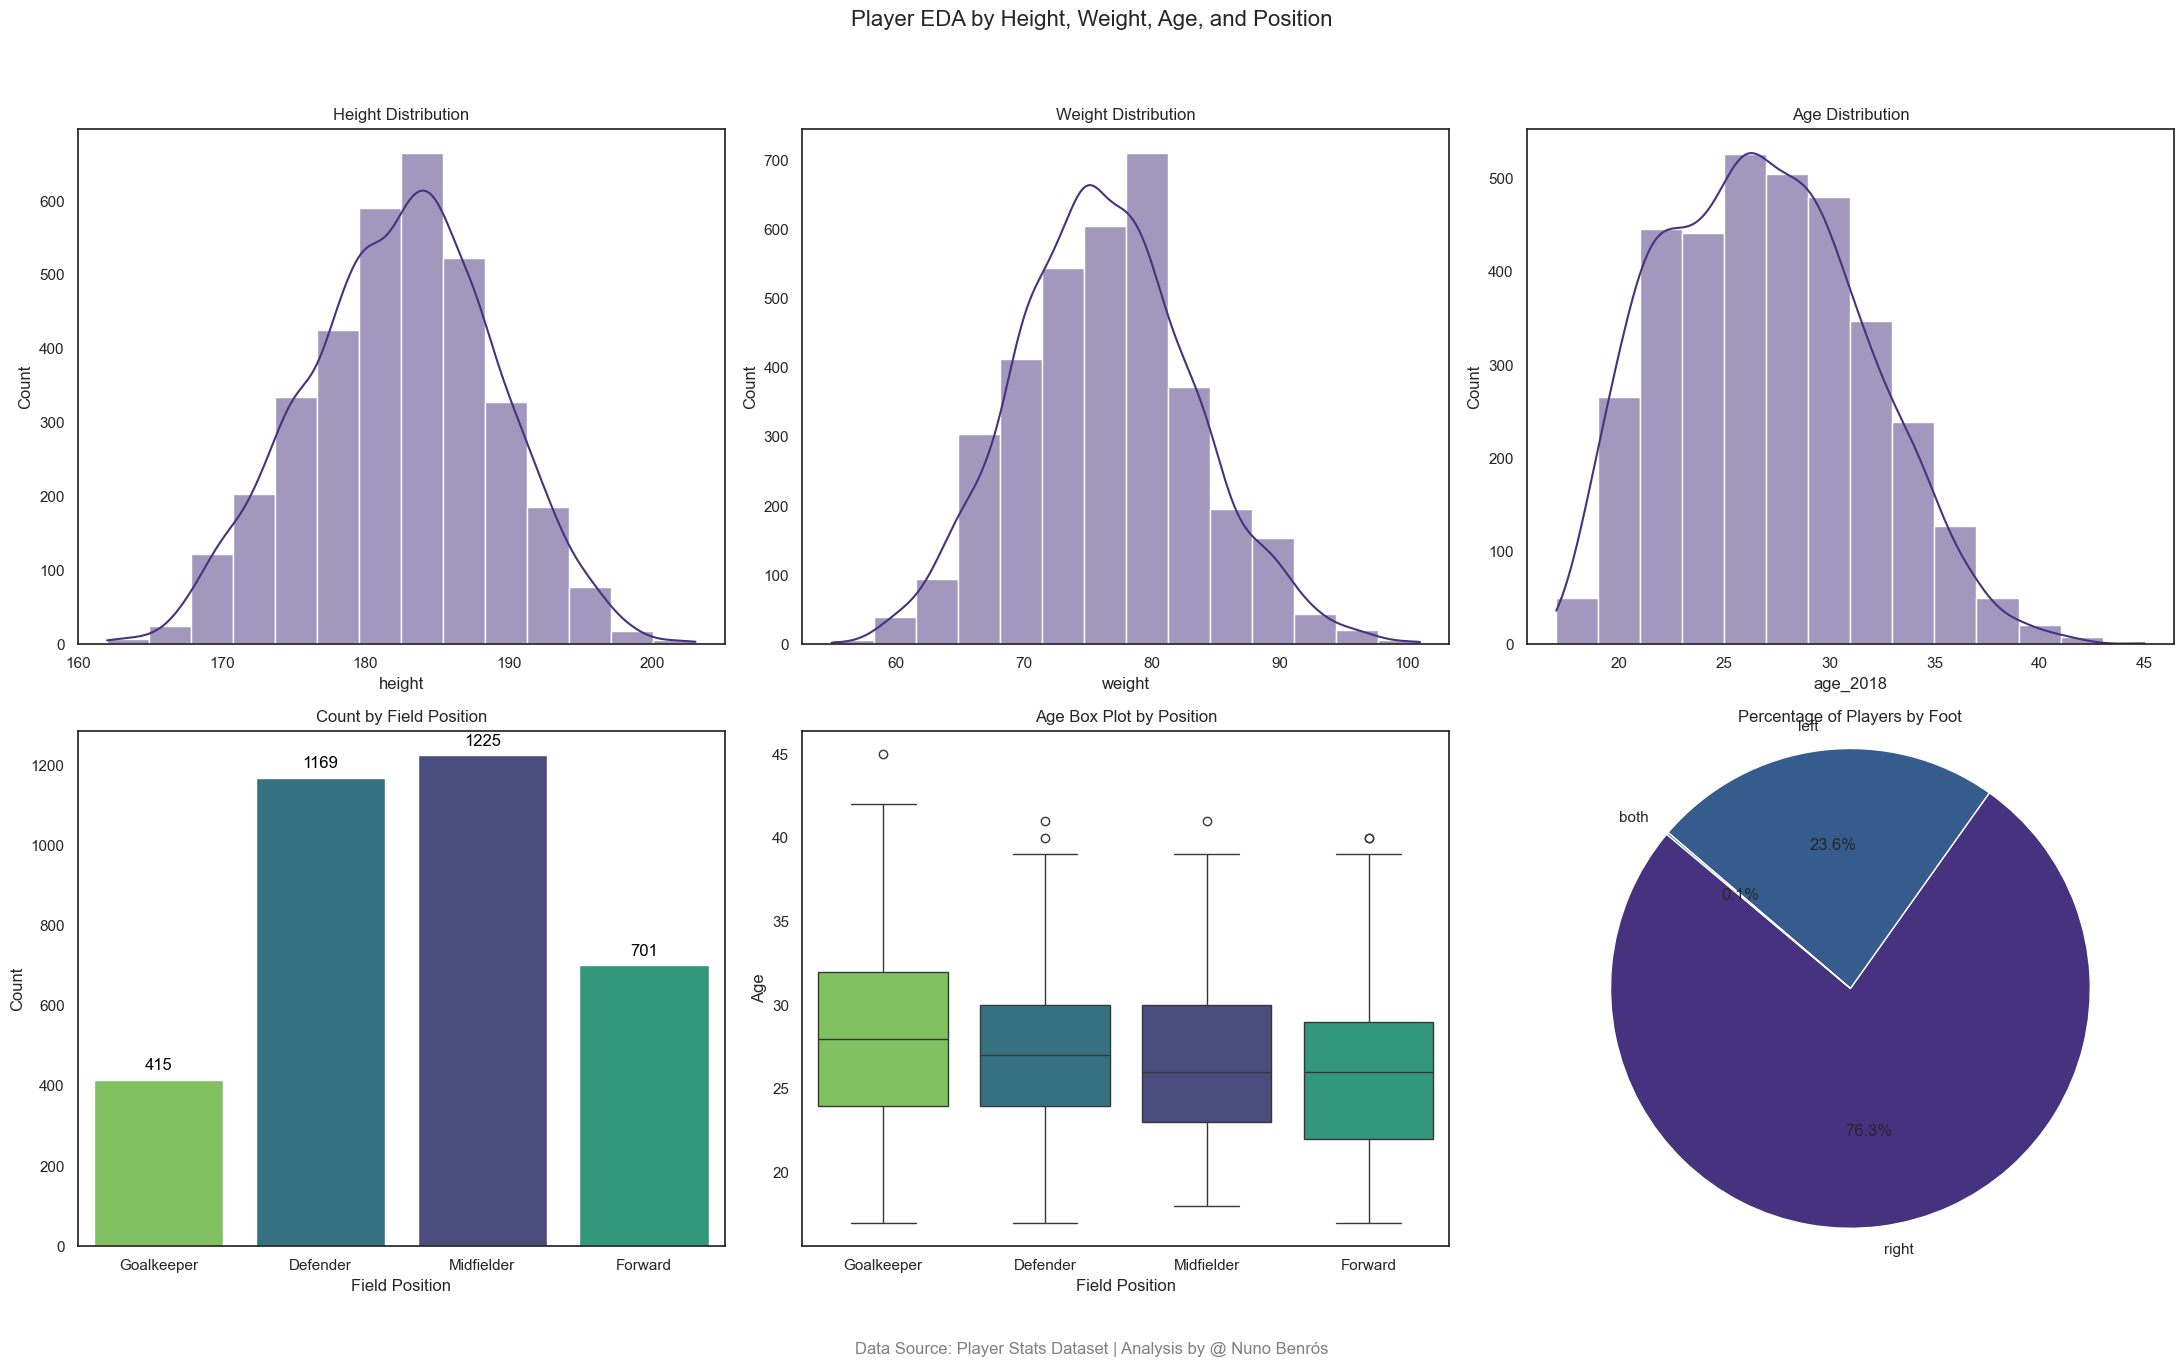

In [11]:

# Create a grid of subplots (2 rows and 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(22, 14))

sns.set(style="whitegrid", palette="viridis")

# Histogram of height
sns.histplot(df_players['height'], bins=14, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Height Distribution')

# Histogram of weight
sns.histplot(df_players['weight'], bins=14, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Weight Distribution')

# Histogram of age
sns.histplot(df_players['age_2018'], bins=14, kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Age Distribution')

# Count of players by role
player_count_by_role = df_players['role.name'].value_counts()

# Define a specific color palette
unique_roles = player_count_by_role.index
palette = sns.color_palette("viridis", len(unique_roles))

# Create a dictionary mapping each role to a specific color
role_color_mapping = dict(zip(unique_roles, palette))

# Bar plot (distribution of players by position)
ax_bar = sns.countplot(x='role.name', data=df_players, ax=axs[1, 0], palette=role_color_mapping)

# Add data labels to the bar plot
for p in ax_bar.patches:
    ax_bar.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                    textcoords='offset points')

# Set titles and labels for the bar plot
axs[1, 0].set_title('Count by Field Position')
axs[1, 0].set_xlabel('Field Position')
axs[1, 0].set_ylabel('Count')

# Box plot of age by role
sns.boxplot(x='role.name', y='age_2018', data=df_players, ax=axs[1, 1], palette=role_color_mapping)
axs[1, 1].set_title('Age Box Plot by Position')
axs[1, 1].set_xlabel('Field Position')
axs[1, 1].set_ylabel('Age')


player_count_by_foot= df_players['foot'].value_counts()
# Pie chart (percentage of players by role)
axs[1, 2].pie(player_count_by_foot, labels=player_count_by_foot.index, autopct='%1.1f%%', 
              startangle=140)
axs[1, 2].set_title('Percentage of Players by Foot')
axs[1, 2].axis('equal')  # Ensures the pie chart is drawn as a circle

# Add a general title for the whole figure
plt.suptitle('Player EDA by Height, Weight, Age, and Position', fontsize=16)

fig.text(0.5, 0.02, 'Data Source: Player Stats Dataset | Analysis by @ Nuno Benrós', ha='center', fontsize=12, color='gray')

#Adjust layout to avoid overlap, making space for both title and footer
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Increased bottom margin to make space for the footer

# Display the plots
plt.show()


In [12]:
# # Barplot
# sns.set(style="white", palette="viridis")
# sns.countplot(x='passportArea.name', data= df_players)

player_count_by_country = df_players['passportArea.name'].value_counts()
top_country=player_count_by_country.head(15)

others_count = player_count_by_country[15:].sum()


top_country['Other Countries'] = others_count

# tree map
top_country_df=top_country.reset_index()
top_country_df.columns= ['Country', 'Player Count']

fig = px.treemap(top_country_df, path=['Country'], values='Player Count', title='Top 15 Países com Mais Jogadores')

fig.show()

C:\Users\TIBUFF\AppData\Local\Temp\ipykernel_6984\330674139.py:20: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



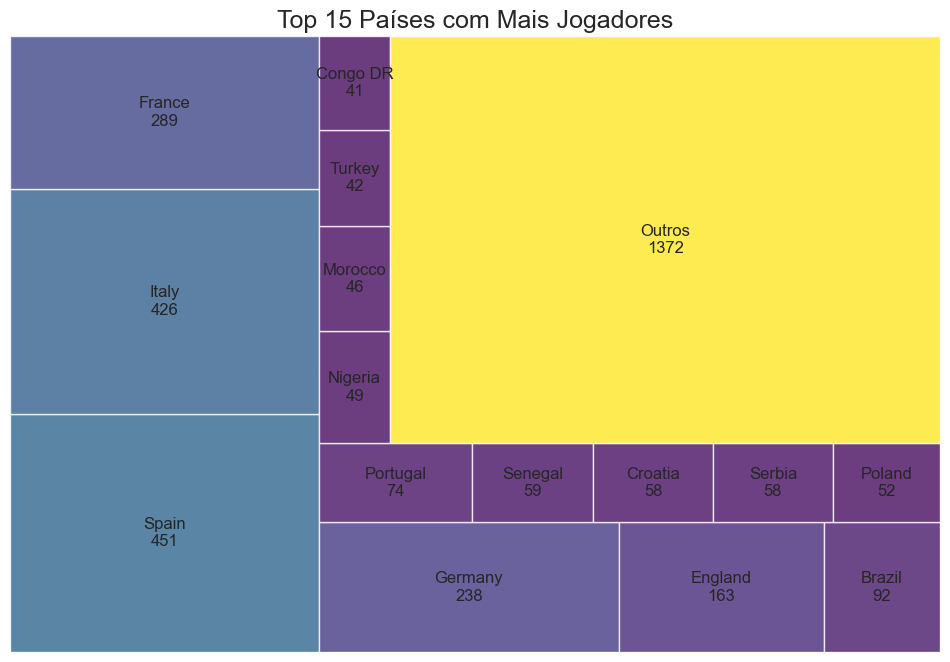

In [13]:
import squarify
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Contagem dos jogadores por país
player_count_by_country = df_players['passportArea.name'].value_counts()

# Top 15 países
top_country = player_count_by_country.head(15)

# Somando os demais países e adicionando a categoria 'Outros'
others_count = player_count_by_country[15:].sum()
top_country['Outros'] = others_count

# Preparando os dados para o treemap
sizes = top_country.values
labels = [f'{country}\n{count}' for country, count in zip(top_country.index, top_country.values)]

# Aplicando o colormap viridis
cmap = cm.get_cmap('viridis')
colors = [cmap(value / max(sizes)) for value in sizes]  # Normalizando as cores com base nos valores

# Criando o treemap com o estilo viridis
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=.8, color=colors)
plt.title('Top 15 Países com Mais Jogadores', fontsize=18)

# Ajustando o layout
plt.axis('off')  # Desligar os eixos
plt.show()


### Linear Regression

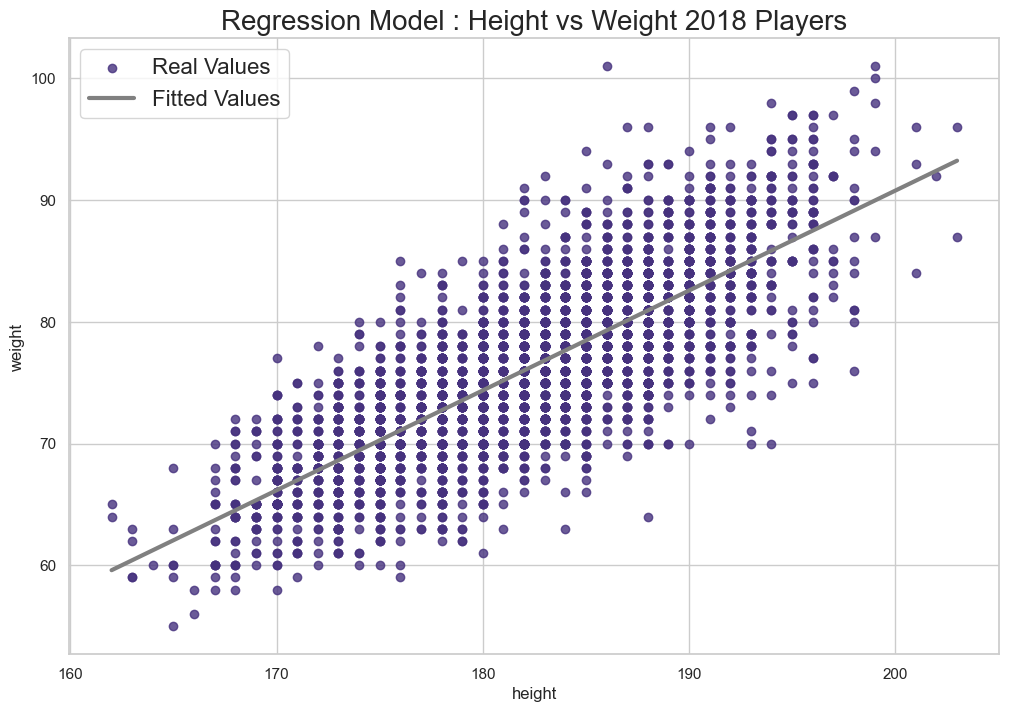

In [18]:
plt.figure(figsize=(12,8))
sns.regplot(data=df_players, x='height', y='weight', marker='o', ci=False,line_kws={"color":'grey', 'linewidth':3})
plt.title('Regression Model : Height vs Weight 2018 Players', fontsize=20)
plt.legend(['Real Values', 'Fitted Values'], fontsize=16, loc='upper left')

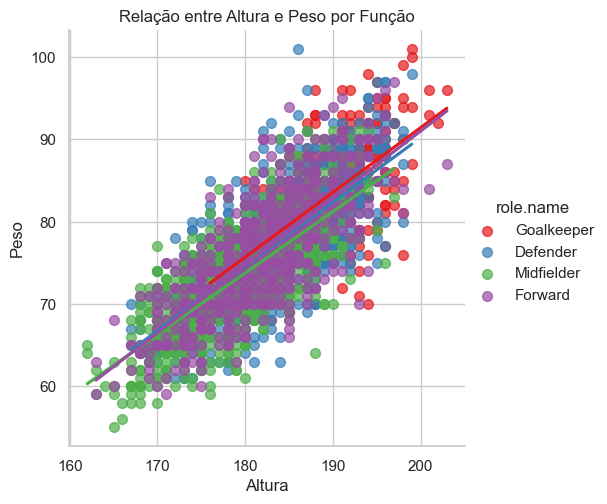

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo uma paleta de cores distintivas
palette = sns.color_palette("Set1")  # Alternativas: 'tab10', 'Paired', etc.

# Plotagem com sns.lmplot ajustando cores automaticamente para as linhas de regressão
sns.lmplot(
    data=df_players,
    x='height',
    y='weight',
    hue='role.name',
    markers='o',
    ci=False,
    palette=palette,  # Aplicando a paleta de cores tanto para os pontos quanto para as linhas
    scatter_kws={"s": 50, "alpha": 0.7}  # Personalizando os pontos
)

plt.title('Relação entre Altura e Peso por Função')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.show()


#### Estimation using OLS

In [15]:
modelo= sm.OLS.from_formula('weight ~ height',df_players).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     5332.
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        08:45:20   Log-Likelihood:                -10170.
No. Observations:                3510   AIC:                         2.034e+04
Df Residuals:                    3508   BIC:                         2.036e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -73.3101      2.051    -35.749      0.000     -77.331     -69.289
height         0.8204      0.011     73.018      0.000       0.798       0.842
==============================================================================
Omnibus:                       23.938   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.588
Skew:                           0.092   Prob(JB):                     1.38e-07
Kurtosis:                       3.427   Cond. No.                     5.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R² relativamente baixo, a variavel independente  explica uma porção razoavel da variabilidade da variavel dependente na analise

In [24]:
import statsmodels.api as sm

# Definindo as variáveis independentes (altura) e dependente (peso)
X = sm.add_constant(df_players['height'])  # Adiciona uma constante para o intercepto
y = df_players['weight']

# Ajustando o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Obtendo os coeficientes
intercepto = modelo.params['const']
coeficiente = modelo.params['height']

# Exibindo a equação da linha de regressão
print(f"Equação da linha de regressão: Peso = {intercepto:.2f} + {coeficiente:.2f} * Altura")


Equação da linha de regressão: Peso = -73.31 + 0.82 * Altura


: 

In [23]:
import pandas as pd
import statsmodels.api as sm

# Separar os grupos únicos na coluna 'role.name'
grupos = df_players['role.name'].unique()

# Iterar sobre cada grupo e ajustar um modelo OLS para obter a equação da linha
for grupo in grupos:
    # Filtrar os dados para o grupo atual
    df_grupo = df_players[df_players['role.name'] == grupo]
    
    # Ajustar o modelo de regressão linear
    X = sm.add_constant(df_grupo['height'])  # Adiciona uma constante para o intercepto
    y = df_grupo['weight']
    modelo = sm.OLS(y, X).fit()
    
    # Coeficientes do modelo
    intercepto = modelo.params['const']
    coeficiente = modelo.params['height']
    
    # Exibir a equação da linha
    print(f"Equação para {grupo}: Peso = {intercepto:.2f} + {coeficiente:.2f} * Altura")


Equação para Goalkeeper: Peso = -65.98 + 0.79 * Altura
Equação para Defender: Peso = -66.29 + 0.78 * Altura
Equação para Midfielder: Peso = -60.82 + 0.75 * Altura
Equação para Forward: Peso = -72.59 + 0.82 * Altura


In [16]:
df_players[['weight','height','age_2018']].corr()

,weight,height,age_2018
weight,1.000000,0.776627,0.242481
height,0.776627,1.000000,0.102248
age_2018,0.242481,0.102248,1.000000
